In [1]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
import matplotlib.colors as mcolors

In [2]:
# Importando dados de FIIs, ETFs e BDRs
ativos = ['KNRI11.SA', 'ONEF11.SA', 'HCTR11.SA', 'HGLG11.SA', 'HGBS11.SA', 'IVVB11.SA', 'AAPL34.SA']
ativos = yf.download(ativos, start='2017-01-01')['Adj Close']

ativos

[*********************100%%**********************]  7 of 7 completed


Ticker,AAPL34.SA,HCTR11.SA,HGBS11.SA,HGLG11.SA,IVVB11.SA,KNRI11.SA,ONEF11.SA
Date,,,,,,,
2017-01-02,4.388696,NaN,163.709976,86.324707,78.639999,116.906036,67.934540
2017-01-03,4.342257,NaN,163.224640,86.324707,76.250000,116.831551,68.080635
2017-01-04,4.327161,NaN,162.981995,86.324707,75.940002,118.254555,68.080635
2017-01-05,4.351543,NaN,162.739380,86.324707,75.260002,118.304184,67.204071
2017-01-06,4.375925,NaN,163.386398,86.324707,76.300003,119.090073,67.204071
...,...,...,...,...,...,...,...
2024-06-28,59.200001,28.889999,210.020004,161.049988,339.829987,158.649994,200.029999
2024-07-01,61.340000,29.139999,210.750000,158.539993,344.899994,158.089996,200.029999
2024-07-02,62.509998,29.209999,211.110001,159.000000,347.010010,156.300003,200.029999


In [3]:
# Importando dados de moedas, índices e criptomoedas
cesta = ['USDBRL=X', 'EURBRL=X', '^BVSP', '^GSPC', 'BTC-USD', 'ETH-USD']
cesta = yf.download(cesta, start='2017-01-01')['Adj Close']
cesta.rename(columns={'USDBRL=X': 'Dolar', 'EURBRL=X': 'Euro', '^BVSP': 'Ibov', '^GSPC': 'S&P500', 'BTC-USD': 'Bitcoin', 'ETH-USD': 'Ethereum'}, inplace=True)

cesta

[*********************100%%**********************]  6 of 6 completed


Ticker,Bitcoin,Ethereum,Euro,Dolar,Ibov,S&P500
Date,,,,,,
2017-01-01,998.325012,NaN,NaN,NaN,NaN,NaN
2017-01-02,1021.750000,NaN,3.4190,3.2532,59589.000000,NaN
2017-01-03,1043.839966,NaN,3.4320,3.2840,61814.000000,2257.830078
2017-01-04,1154.729980,NaN,3.3976,3.2635,61589.000000,2270.750000
2017-01-05,1013.380005,NaN,3.3732,3.2141,62071.000000,2269.000000
...,...,...,...,...,...,...
2024-06-30,62678.292969,3432.889160,NaN,NaN,NaN,NaN
2024-07-01,62851.980469,3440.341553,5.8667,5.5919,124718.000000,5475.089844
2024-07-02,62029.015625,3416.354736,6.0678,5.6550,124787.000000,5509.009766


In [4]:
# Importando dados de ações
acoes = ['PETR4.SA', 'WEGE3.SA', 'LREN3.SA', 'VALE3.SA', 'BPAC11.SA', 'OIBR3.SA']
acoes = yf.download(acoes, start='2017-01-01')['Adj Close']

acoes

[*********************100%%**********************]  6 of 6 completed


Ticker,BPAC11.SA,LREN3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,
2017-01-02,NaN,14.647892,197.021103,4.839574,15.056717,5.168035
2017-01-03,NaN,15.097327,197.767395,5.116875,15.723638,5.428149
2017-01-04,NaN,14.964395,195.528519,5.116875,15.441245,5.298092
2017-01-05,NaN,14.825137,199.259979,5.199404,16.030058,5.284401
2017-01-06,NaN,14.654222,200.006271,5.169694,15.603471,5.328894
...,...,...,...,...,...,...
2024-06-28,30.520691,12.480000,5.400000,38.049999,62.220001,42.127235
2024-07-01,30.807039,12.460000,5.970000,38.630001,63.139999,41.970001
2024-07-02,30.915651,12.160000,6.220000,38.509998,62.930000,42.029999


In [5]:
# Reunindo os dados em apenas um Dataframe
dfs = [ativos, cesta, acoes]
df_final = reduce(lambda left, right: pd.merge(left, right, how='inner', on='Date'), dfs)

df_final

Ticker,AAPL34.SA,HCTR11.SA,HGBS11.SA,HGLG11.SA,IVVB11.SA,KNRI11.SA,ONEF11.SA,Bitcoin,Ethereum,Euro,Dolar,Ibov,S&P500,BPAC11.SA,LREN3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,
2017-01-02,4.388696,NaN,163.709976,86.324707,78.639999,116.906036,67.934540,1021.750000,NaN,3.4190,3.2532,59589.000000,NaN,NaN,14.647892,197.021103,4.839574,15.056717,5.168035
2017-01-03,4.342257,NaN,163.224640,86.324707,76.250000,116.831551,68.080635,1043.839966,NaN,3.4320,3.2840,61814.000000,2257.830078,NaN,15.097327,197.767395,5.116875,15.723638,5.428149
2017-01-04,4.327161,NaN,162.981995,86.324707,75.940002,118.254555,68.080635,1154.729980,NaN,3.3976,3.2635,61589.000000,2270.750000,NaN,14.964395,195.528519,5.116875,15.441245,5.298092
2017-01-05,4.351543,NaN,162.739380,86.324707,75.260002,118.304184,67.204071,1013.380005,NaN,3.3732,3.2141,62071.000000,2269.000000,NaN,14.825137,199.259979,5.199404,16.030058,5.284401
2017-01-06,4.375925,NaN,163.386398,86.324707,76.300003,119.090073,67.204071,902.200989,NaN,3.3897,3.1977,61665.000000,2276.979980,NaN,14.654222,200.006271,5.169694,15.603471,5.328894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-28,59.200001,28.889999,210.020004,161.049988,339.829987,158.649994,200.029999,60320.136719,3373.635986,5.8909,5.5005,123907.000000,5460.479980,30.520691,12.480000,5.400000,38.049999,62.220001,42.127235
2024-07-01,61.340000,29.139999,210.750000,158.539993,344.899994,158.089996,200.029999,62851.980469,3440.341553,5.8667,5.5919,124718.000000,5475.089844,30.807039,12.460000,5.970000,38.630001,63.139999,41.970001
2024-07-02,62.509998,29.209999,211.110001,159.000000,347.010010,156.300003,200.029999,62029.015625,3416.354736,6.0678,5.6550,124787.000000,5509.009766,30.915651,12.160000,6.220000,38.509998,62.930000,42.029999


In [6]:
# Retirar os dados indesejados (NaN)
retornos = df_final.pct_change(fill_method=None).dropna()

retornos

Ticker,AAPL34.SA,HCTR11.SA,HGBS11.SA,HGLG11.SA,IVVB11.SA,KNRI11.SA,ONEF11.SA,Bitcoin,Ethereum,Euro,Dolar,Ibov,S&P500,BPAC11.SA,LREN3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,
2019-07-12,0.000660,0.007194,-0.004078,0.004095,0.001920,0.005945,0.000337,0.040262,0.028182,0.000047,0.001200,-0.011793,0.004620,-0.003779,-0.018782,0.020000,0.004577,-0.004611,-0.021610
2019-07-15,0.013336,-0.008589,-0.004679,0.006447,0.005831,0.001313,-0.001616,-0.077936,-0.168312,-0.002937,-0.005433,-0.000991,0.000176,-0.006725,0.006310,0.058824,-0.012268,0.016985,-0.029883
2019-07-16,0.000651,0.001819,-0.002390,0.022225,-0.002981,0.000000,-0.008363,-0.130100,-0.133118,0.003587,0.005168,-0.000270,-0.003404,0.015625,0.003135,-0.030864,-0.012420,0.006832,0.004911
2019-07-17,-0.005599,0.000000,0.001021,-0.003069,-0.005316,-0.000328,0.006666,0.022807,0.061732,-0.000876,0.003596,0.000781,-0.006531,-0.000171,0.005418,-0.025478,-0.005390,-0.006786,0.000889
2019-07-18,-0.001702,0.000000,0.002393,-0.000577,-0.006180,0.000328,-0.006622,0.100340,0.071311,0.000000,-0.001433,0.008290,0.003582,-0.009232,0.007254,-0.032680,-0.006141,-0.001898,0.009765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-27,-0.000170,0.009961,0.001531,0.014202,0.000268,0.013359,0.000000,0.013049,0.022355,0.008388,0.013173,0.013593,0.000907,-0.007707,0.038779,0.082987,0.016716,0.002606,-0.005959
2024-06-28,0.004071,0.017612,0.011801,0.000247,0.010647,0.002197,0.000000,-0.020853,-0.020659,0.000034,-0.003984,-0.003226,-0.004084,-0.039764,-0.008737,0.034483,0.009016,0.010721,0.011751
2024-07-01,0.036149,0.008654,0.003476,-0.015585,0.014919,-0.003530,0.000000,0.041973,0.019773,-0.004108,0.016617,0.006545,0.002676,0.009382,-0.001603,0.105555,0.015243,0.014786,-0.003732


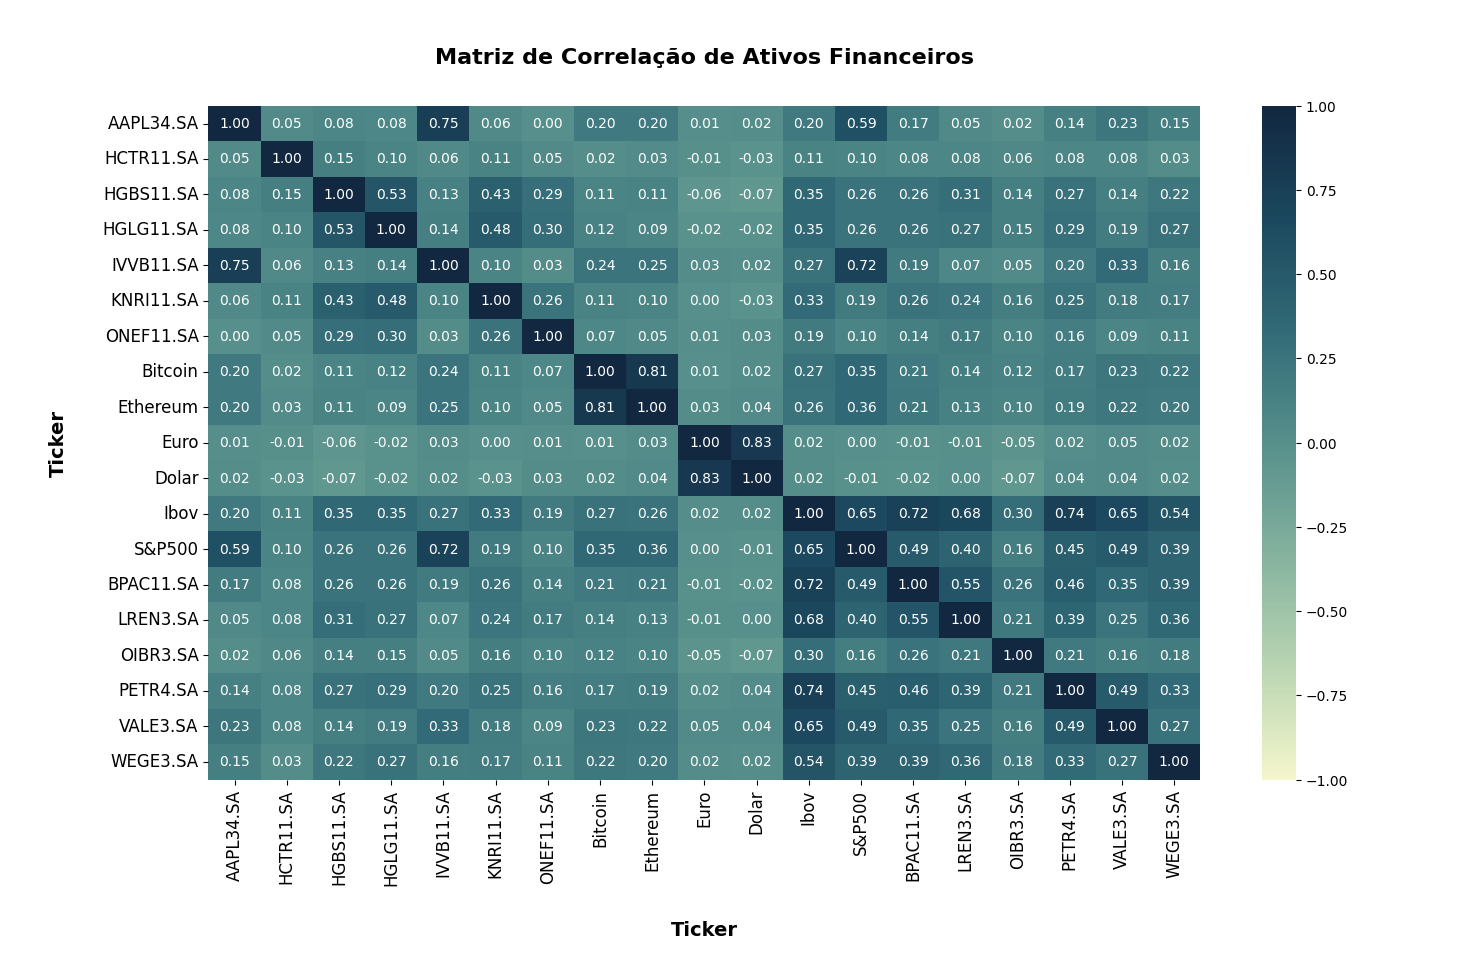

In [7]:
# Matriz de correlação
correlacao = retornos.corr()

# Escolhendo as cores
custom_palette = mcolors.LinearSegmentedColormap.from_list('custom_palette', [
    '#f4f6cc', '#b9d5b2', '#84b29e', '#568f8b', '#326b77', '#1b485e', '#122740'
])

# Configuração do plot
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 1, height_ratios=[0.1, 0.7], hspace=0)  # Título
ax_title = fig.add_subplot(gs[0])  # Subplot para o título
ax_heatmap = fig.add_subplot(gs[1])  # Subplot para o heatmap

# Configuração de espaçamento
ax_title.axis('off')

# Modificação do título
ax_title.text(0.4, 0.5, 'Matriz de Correlação de Ativos Financeiros', fontsize=16, fontweight='bold',
              horizontalalignment='center', verticalalignment='center')

# Plotando a matriz de correlação no subplot existente
sns.heatmap(correlacao, vmin=-1, vmax=1, annot=True, cmap=custom_palette, fmt=".2f", ax=ax_heatmap)

# Configurando os rótulos dos eixos
ax_heatmap.set_xlabel('Ticker', fontsize=14, fontweight='bold', labelpad=25)
ax_heatmap.set_ylabel('Ticker', fontsize=14, fontweight='bold', labelpad=25)

# Configurando espaçamento
ax_heatmap.annotate('', xy=(-0.075, -0.05), xytext=(-0.2, -0.25), xycoords='axes fraction',
                    textcoords='axes fraction', arrowprops=dict(facecolor='white', edgecolor='white', arrowstyle='-'),
                    horizontalalignment='center', verticalalignment='center')

# Ajustando espaçamento dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()